In [1]:
#!wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import os
import shutil

%matplotlib inline

2021-11-22 01:24:47.449663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 01:24:47.449704: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#os.chdir('08-deep-learning')
#os.listdir() 

In [4]:
#for filename in os.listdir('cats'):
    #shutil.copy(filename, 'train/cats')

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './train/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [7]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
X, y = next(train_ds)
y[:5]

array([1., 0., 1., 1., 0.], dtype=float32)

In [9]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './train/validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [10]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

opt = SGD(learning_rate=0.002, momentum=0.8)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

2021-11-22 01:24:52.584038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 01:24:52.584067: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 01:24:52.584085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aljekso-VirtualBox): /proc/driver/nvidia/version does not exist
2021-11-22 01:24:52.585722: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [12]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 54s 538ms/step - loss: 0.7001 - accuracy: 0.5205 - val_loss: 0.6886 - val_accuracy: 0.5660
Epoch 2/10
100/100 [==============================] - 44s 444ms/step - loss: 0.6854 - accuracy: 0.5550 - val_loss: 0.6828 - val_accuracy: 0.5790
Epoch 3/10
100/100 [==============================] - 48s 479ms/step - loss: 0.6790 - accuracy: 0.5720 - val_loss: 0.6844 - val_accuracy: 0.5600
Epoch 4/10
100/100 [==============================] - 44s 443ms/step - loss: 0.6744 - accuracy: 0.5865 - val_loss: 0.6891 - val_accuracy: 0.5400
Epoch 5/10
100/100 [==============================] - 44s 442ms/step - loss: 0.6708 - accuracy: 0.5875 - val_loss: 0.6713 - val_accuracy: 0.5920
Epoch 6/10
100/100 [==============================] - 45s 450ms/step - loss: 0.6710 - accuracy: 0.5920 - val_loss: 0.6671 - val_accuracy: 0.5790
Epoch 7/10
100/100 [==============================] - 63s 629ms/step - loss: 0.6606 - accuracy: 0.6035 - val_loss: 0.6478 - val_ac

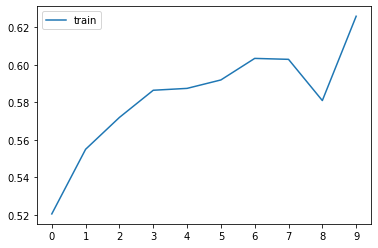

In [13]:
plt.plot(history.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()

In [14]:
np.median(history.history['accuracy']) #0.6372500061988831 0.5867500007152557

0.5869999825954437

In [15]:
np.std(history.history['loss'])

0.016225953686594408

In [16]:
model.save('partly_trained2.h5')

In [17]:
train_gen2 = ImageDataGenerator(rescale=1./255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

train_ds2 = train_gen2.flow_from_directory(
    './train/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

val_gen2 = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

val_ds2 = val_gen2.flow_from_directory(
    './train/validation',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

from keras.models import load_model
model2 = load_model('partly_trained2.h5')

history2 = model2.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds2,
    validation_steps=50
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 72s 714ms/step - loss: 0.6632 - accuracy: 0.5900 - val_loss: 0.6644 - val_accuracy: 0.5930
Epoch 2/10
100/100 [==============================] - 61s 605ms/step - loss: 0.6692 - accuracy: 0.5750 - val_loss: 0.6675 - val_accuracy: 0.5800
Epoch 3/10
100/100 [==============================] - 59s 592ms/step - loss: 0.6701 - accuracy: 0.5705 - val_loss: 0.6600 - val_accuracy: 0.5900
Epoch 4/10
100/100 [==============================] - 60s 599ms/step - loss: 0.6645 - accuracy: 0.5825 - val_loss: 0.6653 - val_accuracy: 0.5980
Epoch 5/10
100/100 [==============================] - 60s 601ms/step - loss: 0.6676 - accuracy: 0.5900 - val_loss: 0.6592 - val_accuracy: 0.6000
Epoch 6/10
100/100 [==============================] - 59s 584ms/step - loss: 0.6594 - accuracy: 0.5910 - val_loss: 0.6527 - val_accuracy: 0.6210
Epoch 7/10
100/100 [=========================

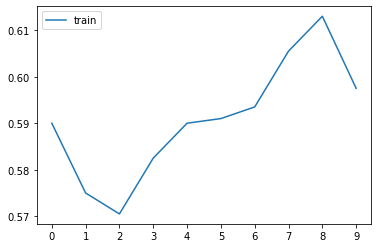

In [18]:
plt.plot(history2.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()

In [19]:
np.mean(history2.history['val_loss'])

0.6547664284706116

In [20]:
np.average(history2.history['val_accuracy'][6:])

0.6187500059604645

In [21]:
history = model.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds2,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 58s 580ms/step - loss: 0.6660 - accuracy: 0.5835 - val_loss: 0.6565 - val_accuracy: 0.5950
Epoch 2/10
100/100 [==============================] - 58s 577ms/step - loss: 0.6654 - accuracy: 0.5885 - val_loss: 0.6709 - val_accuracy: 0.5970
Epoch 3/10
100/100 [==============================] - 62s 623ms/step - loss: 0.6651 - accuracy: 0.5940 - val_loss: 0.6573 - val_accuracy: 0.6120
Epoch 4/10
100/100 [==============================] - 60s 596ms/step - loss: 0.6622 - accuracy: 0.5890 - val_loss: 0.6651 - val_accuracy: 0.5610
Epoch 5/10
100/100 [==============================] - 60s 597ms/step - loss: 0.6684 - accuracy: 0.5870 - val_loss: 0.6617 - val_accuracy: 0.5910
Epoch 6/10
100/100 [==============================] - 60s 597ms/step - loss: 0.6542 - accuracy: 0.6060 - val_loss: 0.6524 - val_accuracy: 0.6220
Epoch 7/10
100/100 [==============================] - 60s 594ms/step - loss: 0.6598 - accuracy: 0.5950 - val_loss: 0.6467 - val_ac

In [22]:
np.mean(history.history['val_loss'])

0.6564920604228973

In [23]:
np.average(history.history['val_accuracy'][6:])

0.6095000058412552

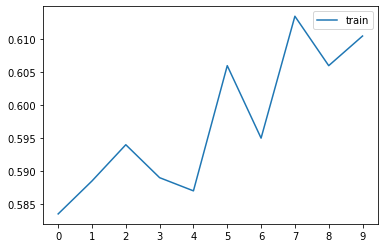

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()